In [1]:
# Import libraries
import os
import numpy as np
import torch
import pandas as pd
import os 
from datetime import datetime, timedelta
from datetime import timedelta

In [2]:
file = "traffic.txt"
isExist = os.path.exists(file)
if not isExist:
    print(f"Files not exist")

In [3]:
"""Preprocess data"""
data = pd.read_csv('traffic.txt', delimiter = ',', header=None)
print('data loaded..')
data_2 = data.copy()
#pick the first 20 clients
data_2 = data_2.iloc[:,:20]
#create time column: 2 years 1 hour
data_2['time'] = pd.to_datetime(np.arange(datetime(2015,1,1), datetime(2017,1,1), timedelta(hours=1)))
data_2.index = data_2['time']
data_2 = data_2.drop(['time'], axis = 1)
#create column names
data_3 = data_2.copy()
col_names = ['MT_{0:03}'.format(i+1) for i in range(data_3.shape[1])]
data_3.columns = col_names
aggregated_data = data_3.copy()

data loaded..


In [4]:
aggregated_data.shape

(17544, 862)

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Std_normalization = 1
if Std_normalization:
    scaler = StandardScaler()
    temp = scaler.fit_transform(aggregated_data)
    norm_means = scaler.mean_
    norm_std = scaler.scale_
else:
    scaler = MinMaxScaler()
    temp = scaler.fit_transform(aggregated_data)
global data_4
normalized_data = pd.DataFrame(temp, index=aggregated_data.index, columns = aggregated_data.columns)

In [6]:
normalized_data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020
time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,-0.712761,-0.649143,-0.936348,-1.154807,-0.569033,-0.500971,-0.765328,-0.665566,-0.660995,-0.414196,-0.822551,-0.854473,-0.914064,-0.568700,-0.899862,-0.569866,-1.335692,-0.748872,-0.798016,-0.608055
2015-01-01 01:00:00,-0.674341,-0.645010,-0.862140,-1.067719,-0.513278,-0.488945,-0.701394,-0.490022,-0.447094,-0.407787,-0.770593,-0.822892,-0.849406,-0.507760,-0.835587,0.155680,-1.213432,-0.748872,-0.514071,-0.599583
2015-01-01 02:00:00,-0.725568,-0.742124,-0.963111,-1.203794,-0.610849,-0.594173,-0.822705,-0.641794,-0.681695,-0.484698,-0.886055,-0.901844,-0.951011,-0.735623,-1.053028,-0.145701,-1.310521,-0.952812,-0.716423,-0.691364
2015-01-01 03:00:00,-0.727168,-0.826841,-1.022720,-1.296324,-0.666604,-0.672342,-0.886640,-0.810024,-0.959996,-0.602201,-1.015951,-0.929478,-1.023059,-0.923742,-1.177476,-0.839993,-1.321309,-1.093459,-0.977522,-0.729489
2015-01-01 04:00:00,-0.722366,-0.837172,-1.055566,-1.318096,-0.680543,-0.706917,-0.925984,-0.948996,-1.114097,-0.573359,-1.079455,-0.943294,-1.041533,-1.045622,-1.233545,-1.221742,-1.342884,-1.130380,-1.170083,-0.753493


In [7]:
"""

Create missing values based on normal distribution random choice

Input: 
 - pd_data: 2d pandas data frame
 - missing_percentage: missing percentage <= 100

Output:
 - return_data: 2d pandas with missed values

"""
def create_missing_data(pd_data, missing_percentage = 20):
    if missing_percentage == 0: return pd_data
    assert missing_percentage <= 100, "missing percentage should be less than or equal 100%"
    np.random.seed(1993)
    # Convert data frame to array
    np_data = pd_data.to_numpy()
    # Convert original data to 1d array - Because existing package only supports to randomly choose indices from 1d array
    np_data_1d = np_data.flatten()
    # Randomly choose missing index
    total_elem = np_data_1d.shape[0]
    number_of_missing_elem = int(missing_percentage*1.0*total_elem/100)
    missing_index = np.random.choice(np.arange(total_elem), number_of_missing_elem, replace=False) # with replace = False, an index only is chosen 1 time
    # Replace missing_index with 0
    np_data_1d[missing_index] = 0
    # Convert 1d array to 2d array
    np_data_2d = np_data_1d.reshape(pd_data.shape[0], pd_data.shape[1])
    # Convert 2d array to dataframe
    cols_name = pd_data.columns
    return_data = pd.DataFrame(np_data_2d, columns = cols_name)
    return_data.index = pd_data.index
    return return_data

missing_df = create_missing_data(normalized_data, missing_percentage=20)
missing_df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020
time,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,-0.712761,-0.649143,0.000000,-1.154807,0.000000,-0.500971,-0.765328,-0.665566,0.000000,-0.414196,-0.822551,-0.854473,0.000000,0.000000,-0.899862,-0.569866,-1.335692,-0.748872,-0.798016,-0.608055
2015-01-01 01:00:00,-0.674341,-0.645010,-0.862140,-1.067719,-0.513278,0.000000,-0.701394,-0.490022,-0.447094,0.000000,-0.770593,-0.822892,-0.849406,-0.507760,-0.835587,0.155680,-1.213432,0.000000,0.000000,-0.599583
2015-01-01 02:00:00,-0.725568,-0.742124,-0.963111,-1.203794,-0.610849,-0.594173,-0.822705,-0.641794,-0.681695,-0.484698,-0.886055,0.000000,-0.951011,-0.735623,-1.053028,-0.145701,-1.310521,-0.952812,-0.716423,-0.691364
2015-01-01 03:00:00,-0.727168,0.000000,-1.022720,-1.296324,-0.666604,0.000000,-0.886640,0.000000,0.000000,-0.602201,-1.015951,-0.929478,-1.023059,0.000000,-1.177476,-0.839993,0.000000,-1.093459,-0.977522,-0.729489
2015-01-01 04:00:00,-0.722366,-0.837172,-1.055566,-1.318096,-0.680543,-0.706917,-0.925984,-0.948996,-1.114097,-0.573359,-1.079455,-0.943294,-1.041533,-1.045622,0.000000,-1.221742,-1.342884,-1.130380,-1.170083,-0.753493


In [8]:
global n_clients; global data_train; global data_test
def set_train_test(n_clients=20):
    data_train = normalized_data.iloc[:17376,:n_clients] 
    data_test = normalized_data.iloc[17376:,:n_clients]
    return data_train, data_test

In [9]:
data_train, data_test = set_train_test(n_clients=20)
print(data_train.shape)
print(data_test.shape)

(17376, 20)
(168, 20)


In [10]:
def get_flattened_obs(data_train, L=80):
    df = data_train
    N = df.shape[1]
#     col_to_row_ratio = 4

    T = df.shape[0]

    M = int(df.size / L)
    if M%N != 0:
        M -= M%N
    M_ts = M // N
    # inc_obs = np.array(df.iloc[:M_ts*L,:]) # first range, we use second range for traning
    inc_obs = np.array(df.iloc[T%L:,:]) # second range, note its not T%L+1 due to python index
    normalize = False
    from sklearn.preprocessing import StandardScaler
    if normalize:
        scaler = StandardScaler()
        inc_obs = scaler.fit_transform(inc_obs)
        norm_means = scaler.mean_
        norm_std = scaler.scale_

    flattened_obs = inc_obs.reshape([L,M], order = 'F') # 按照列顺序
    # flattened_obs = flattened_obs[:,np.arange(M_ts*self.no_ts).reshape([self.no_ts,M_ts]).flatten('F')] # 这里导致第二列是ts2，stacked page是不同ts交错组成
    return flattened_obs, M_ts

In [11]:
# Define parameters
n_users = 20 
window  = 40
missing_percentage = 40
prediction_steps = 24 # 1 day prediction

In [12]:
# Create missing data for training
data_train_missing_vals = create_missing_data(data_train, missing_percentage=missing_percentage)
data_train_missing_vals.shape

(17376, 20)

In [13]:
# Convert data to type of array
data_train_missing_vals_np = data_train_missing_vals.to_numpy()
data_test_np = data_test.to_numpy()
# Check shape
data_train_missing_vals_np.shape, data_test_np.shape

((17376, 20), (168, 20))

In [14]:
# Change shape
data_train_missing_vals_np = data_train_missing_vals_np.T 
data_test_np = data_test_np.T 
data_train_missing_vals_np.shape, data_test_np.shape

((20, 17376), (20, 168))

In [15]:
# Create ts data for Dataset
def create_np_train_data(train_data, window=window):
    length_ts_data = train_data.shape[0]
    x_test = []
    y_test = []

    for i in range(length_ts_data - window):
        x_test.append(train_data[i:i+window])
        y_test.append(train_data[i+window])
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return x_test, y_test
# Test function creating data by using window
X = data_train_missing_vals_np[0]
x, y = create_np_train_data(data_train_missing_vals_np[0], window=window)
x.shape, y.shape

((17336, 40), (17336,))

In [16]:
data_x_missing_vals_window = []
data_y_missing_vals_window = []

for user_id in range(n_users):
    x_missing_data, y_missing_data = create_np_train_data(data_train_missing_vals_np[user_id], window=window)
    data_x_missing_vals_window.append(x_missing_data)
    data_y_missing_vals_window.append(y_missing_data)
    # break 
data_x_missing_vals_window = np.array(data_x_missing_vals_window)
data_y_missing_vals_window = np.array(data_y_missing_vals_window)
data_x_missing_vals_window.shape, data_y_missing_vals_window.shape

((20, 17336, 40), (20, 17336))

In [17]:
for i in range(n_users):
    if i == 0:
        data_x = data_x_missing_vals_window[0]
        data_y = data_y_missing_vals_window[0]
    else: 
        data_x = np.concatenate((data_x, data_x_missing_vals_window[i]))
        data_y = np.concatenate((data_y, data_y_missing_vals_window[i]))
data_x.shape, data_y.shape

((346720, 40), (346720,))

In [18]:
from torch.utils.data import Dataset

# Create dataset
class timeseries(Dataset):
  def __init__(self, x, y):
    self.x = torch.Tensor(x)
    self.y = torch.Tensor(y)
    self.len = x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx] 
  
  def __len__(self):
    return self.len

dataset = timeseries(data_x, data_y)

# Create dataloader
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset, shuffle=True, batch_size=64)

In [19]:
from torch.utils.data import Dataset

# Create dataset
class timeseries(Dataset):
  def __init__(self, x, y):
    self.x = torch.Tensor(x)
    self.y = torch.Tensor(y)
    self.len = x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx] 
  
  def __len__(self):
    return self.len

dataset = timeseries(data_x, data_y)

# Create dataloader
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset, shuffle=True, batch_size=64)

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [21]:
from torch import nn

class LSTM_nn(nn.Module):
    def __init__(self):
        super(LSTM_nn,self).__init__()
        self.lstm = nn.LSTM(input_size=1,hidden_size=5,num_layers=3,batch_first=True)
        self.fc1 = nn.Linear(in_features=5,out_features=1)

    def forward(self,x):
        output, _status = self.lstm(x)
        output = output[:,-1,:]
        output = self.fc1(torch.relu(output))
        return output

model = LSTM_nn()
model = model.to(device)

# Settings to get the best performance on Traff
- missing percentage: 00 - epochs: 2
- missing percentage: 20 - epochs: 1
- missing percentage: 40 - epochs: 1

In [22]:
# optimizer , loss
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
epochs = 1

In [23]:
#training loop
for i in range(epochs):
    for data in train_loader:
        input, label = data
        input = input.view(-1,window,1)
        input, label = input.to(device), label.to(device)
        # print(input.shape)
        y_pred = model(input).reshape(-1)
        loss = criterion(y_pred, label)
        loss.backward()
        optimizer.step()
    if i%2 == 0:
        print(i,"th iteration : ",loss)

0 th iteration :  tensor(1.1765, device='cuda:0', grad_fn=<MseLossBackward0>)


In [24]:
"""Prepare data to test the model"""

# Get the last window training data
data_train_missing_vals_np
# Get the last window of train data
last_window = data_train_missing_vals_np[:, -window:]

# Get actual data for prediction steps
actual_steps = data_test_np[:, -prediction_steps:]

# Check shape
last_window.shape, actual_steps.shape

((20, 40), (20, 24))

In [25]:
def create_test_np_data(user_test_data, prediction_steps=24):
    x_test = []
    y_test = []

    for i in range(prediction_steps):
        x_test.append(user_test_data[i:i+window])
        y_test.append(user_test_data[i+window])
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return x_test, y_test

In [26]:
model

LSTM_nn(
  (lstm): LSTM(1, 5, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=5, out_features=1, bias=True)
)

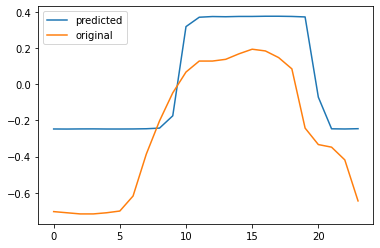

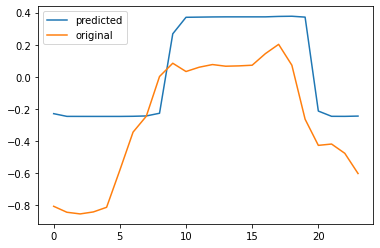

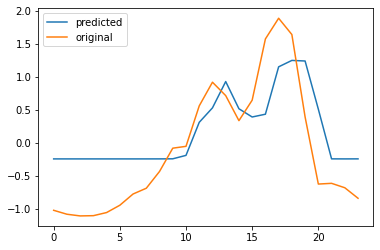

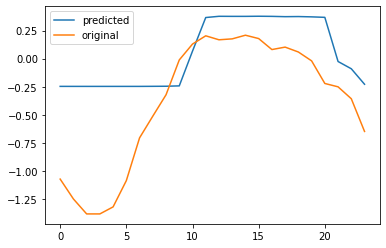

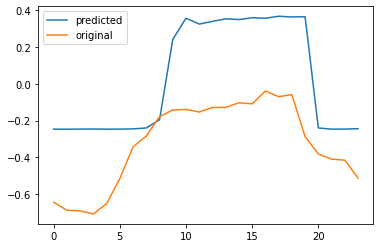

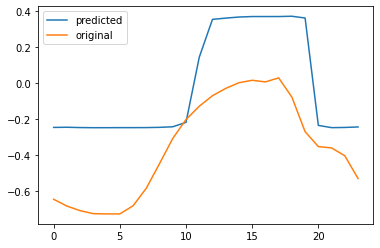

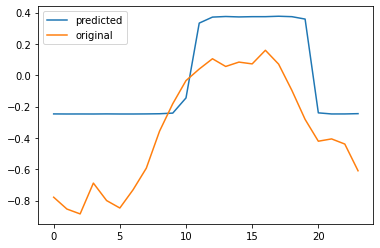

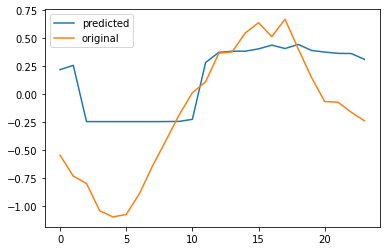

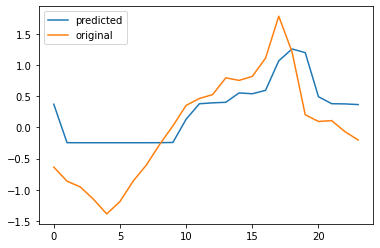

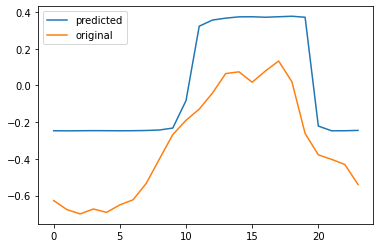

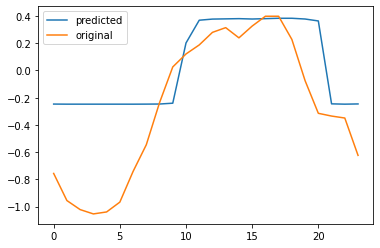

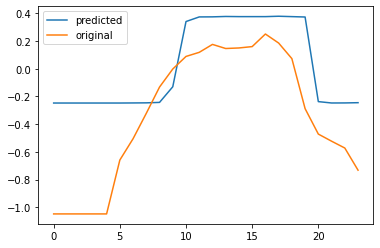

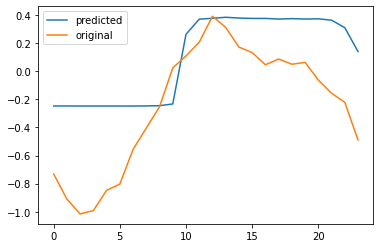

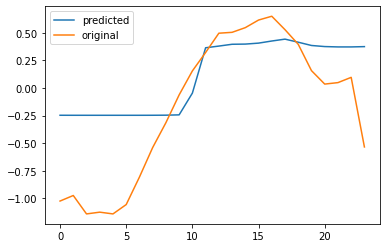

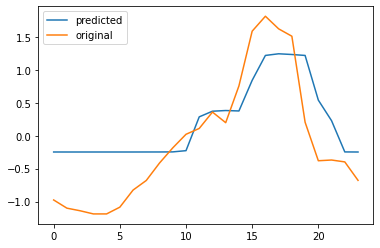

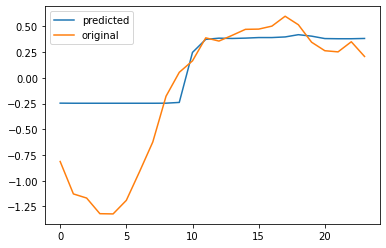

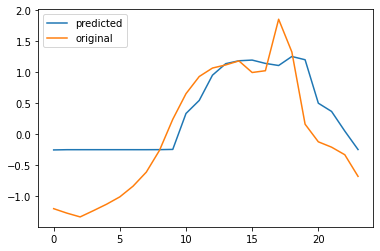

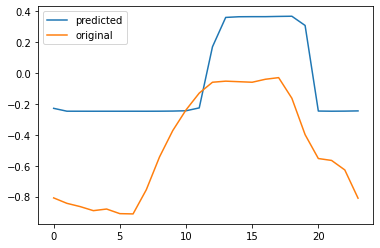

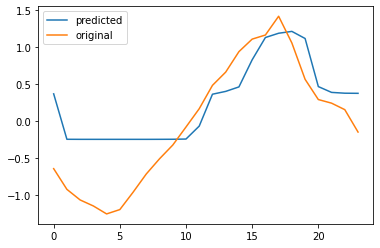

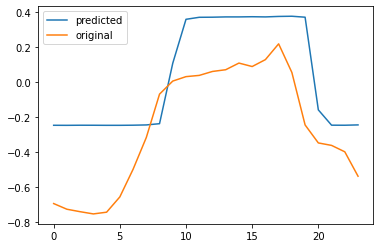

RMSE LSTM: 0.4781605899333954


In [27]:
import matplotlib.pyplot as plt
diff_list = []
y_pred = []
y_true = []
for user_id in range(n_users):
    user_last_window = last_window[user_id]
    user_actual_steps = actual_steps[user_id]
    user_test_data = np.concatenate((user_last_window, user_actual_steps), axis=None)
    # print(f"{user_last_window.shape}, {user_actual_steps.shape}, {user_test_data.shape}")

    """Create input data for data model"""
    # Create np data
    x_test, y_test = create_test_np_data(user_test_data=user_test_data, prediction_steps=prediction_steps)
    # Cretate dataset
    test_set = timeseries(x_test, y_test)
    # Prediction
    input = test_set[:][0].view(-1,window,1)
    actual = test_set[:][1].view(-1)
    input = input.to(device)
    test_pred = model(input).view(-1)
    predictions_24 = test_pred.cpu().detach().numpy()
    actual = actual.numpy()
    diff = predictions_24 - actual
    diff_list.append(diff)
    plt.plot(predictions_24, label='predicted')
    plt.plot(actual, label='original')
    plt.legend()
    plt.plot()
    plt.show()
    # break
    y_pred.append(predictions_24)
    y_true.append(actual)
diff_np = np.array(diff_list)
rmse = np.sqrt(np.mean(np.square(diff_np)))
print(f"RMSE LSTM: {rmse}")

In [28]:
dataset = "Traff"
model_name = f"{dataset}_centralized_lstm_num_user_20_missing_{missing_percentage}.pt"
model_path = os.path.join("models", "centralized_lstm_traffic")
torch.save(model, os.path.join(model_path, model_name))

In [29]:
y_pred_np = np.array(y_pred)
y_true_np = np.array(y_true)

y_pred_np.shape, y_true_np.shape

((20, 24), (20, 24))

In [30]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
def evaluate_Testset(y_true, y_pred):
    def mape(y_true, y_pred): 
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    MSE = mse(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mae(y_true, y_pred)
    MAPE = mape(y_true, y_pred)
    return MSE, RMSE, MAE, MAPE

# Function to estimate accuracy for one user
def accuracy_Testset(y_true, y_pred):
  diff_pred = list()
  diff_true = list()
  accuracy = 0.
  for i in range(len(y_true)-1):
      diff_pred.append(y_pred[i+1]-y_pred[i])
      diff_true.append(y_true[i+1]-y_true[i])
  count = sum(diff_pred[i] * diff_true[i] > 0 for i in range(len(diff_pred)))
  accuracy = count/len(diff_pred) * 100
  return accuracy

# Function to estimate average accuracy for multiple users
def average_acc(y_true, y_pred):
    n_users = y_true.shape[0]
    acc_list = []
    for i in range(n_users):
        y_true_i = y_true[i]
        y_pred_i = y_pred[i]
        acc = accuracy_Testset(y_true_i, y_pred_i)
        acc_list.append(acc)
    acc_np = np.array(acc_list)
    # print(acc_np)
    avg_acc = np.mean(acc_np)
    return avg_acc

In [31]:
MSE, RMSE, MAE, MAPE = evaluate_Testset(y_true_np, y_pred_np)
avg_acc = average_acc(y_true_np, y_pred_np)
print(f"MSE: {MSE}, RMSE: {RMSE}, MAE: {MAE}, MAPE: {MAPE}")
print(f"Avg_Acc: {avg_acc}")

MSE: 0.22863756120204926, RMSE: 0.4781605899333954, MAE: 0.39418458938598633, MAPE: 267.4985647201538
Avg_Acc: 62.826086956521735
